<a href="https://colab.research.google.com/github/stevansehn/python-spambase-dataset-classification/blob/main/spambase_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/RNA_Datasets/spambase.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [4]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [7]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

# kNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [11]:
from sklearn.neighbors import KNeighborsClassifier

cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1116
           1       0.75      0.70      0.72       725

    accuracy                           0.79      1841
   macro avg       0.78      0.77      0.78      1841
weighted avg       0.79      0.79      0.79      1841



In [12]:
cls.predict_proba(X_test.iloc[1:10,]).round(4)

array([[0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6]])

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [13]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression(random_state=21, max_iter=3000)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1116
           1       0.92      0.90      0.91       725

    accuracy                           0.93      1841
   macro avg       0.93      0.92      0.93      1841
weighted avg       0.93      0.93      0.93      1841



In [14]:
cls.predict_proba(X_test.iloc[1:10,]).round(3)

array([[0.998, 0.002],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.004, 0.996],
       [0.958, 0.042],
       [0.895, 0.105],
       [0.   , 1.   ],
       [0.593, 0.407],
       [0.602, 0.398]])

In [15]:
print(cls.intercept_)
print(cls.coef_)

[-1.78422099]
[[-4.14792855e-01 -1.24025300e-01  1.57029887e-01  8.46602244e-01
   5.16592585e-01  3.38017612e-01  2.22257473e+00  5.75710599e-01
   2.40281763e-01  3.58493564e-01 -5.04029399e-01 -1.41861663e-01
   1.47887126e-01 -2.54781740e-02  6.21816400e-01  8.79276652e-01
   1.22753484e+00  1.41921876e-01  6.72152362e-02  1.44677535e+00
   2.64796387e-01  5.99622642e-02  2.22006569e+00  3.03987254e-01
  -1.88492138e+00 -7.21078039e-01 -2.63098005e+00  1.55122918e-01
  -8.77058683e-01 -9.56830554e-03 -1.63823200e-01  1.60891563e-01
  -9.05459587e-01 -5.26772046e-02 -8.14398602e-01  9.43095010e-01
  -9.73991096e-02  3.15423296e-01 -7.79689033e-01 -1.07005148e+00
  -1.59816111e+00 -1.78993615e+00 -6.78044113e-01 -1.75694019e+00
  -4.66029526e-01 -1.78894777e+00 -4.93646899e-01 -1.44597577e+00
  -7.80852238e-01 -8.37721421e-02 -5.10997354e-01  6.36298486e-01
   2.93174403e+00  1.04153876e+00  1.01575295e-01  5.17659504e-03
   6.55325020e-04]]


## Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [16]:
from sklearn.tree import DecisionTreeClassifier


cls = DecisionTreeClassifier(random_state=0)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1116
           1       0.89      0.89      0.89       725

    accuracy                           0.91      1841
   macro avg       0.91      0.91      0.91      1841
weighted avg       0.91      0.91      0.91      1841



In [17]:
cls.predict_proba(X_test.iloc[1:10,]).round(3)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

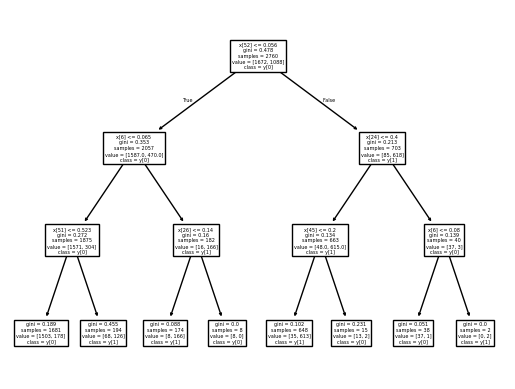

In [19]:
from sklearn.tree import plot_tree

cls = DecisionTreeClassifier(max_depth=3)
# cls = DecisionTreeClassifier(min_samples_leaf=30)
cls.fit(X_train, y_train)

_ = plot_tree(cls, class_names=True)

## SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
from sklearn.svm import SVC


cls = SVC(random_state=0, probability=True)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1116
           1       0.70      0.39      0.50       725

    accuracy                           0.69      1841
   macro avg       0.70      0.64      0.64      1841
weighted avg       0.70      0.69      0.67      1841



In [21]:
cls.predict_proba(X_test.iloc[1:10,]).round(3)

array([[0.595, 0.405],
       [0.767, 0.233],
       [0.731, 0.269],
       [0.24 , 0.76 ],
       [0.558, 0.442],
       [0.778, 0.222],
       [0.275, 0.725],
       [0.748, 0.252],
       [0.664, 0.336]])

#### 1. Compare a medida F1 obtida pelos 4 algoritmos apresentados em aula usando suas configurações padrão (sem mudar nenhum hiperparâmetro). *Para evitar warnings de execução do algoritmo Regressão Logistica defina (max_iter=3000).

## Validação cruzada

Lista de medidas:
- https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

In [42]:
knn = cls = KNeighborsClassifier()
lr = LogisticRegression(random_state=0, max_iter=3000)
dt = DecisionTreeClassifier(random_state=0)
svm = SVC(random_state=0)

for cls in [knn, lr, dt, svm]:
  scores = cross_val_score(cls, X, y, cv=5, scoring='f1')
  print(cls, scores.mean())

KNeighborsClassifier() 0.7086788359677378
LogisticRegression(max_iter=3000, random_state=0) 0.8894661169372649
DecisionTreeClassifier(random_state=0) 0.8588126692160616
SVC(random_state=0) 0.5397846645318335


In [43]:
# idem acima, mas usando cross_validate
for cls in [knn, lr, dt, svm]:
  scores = cross_validate(cls, X, y, cv=5, scoring='f1')
  print(cls, scores['test_score'].mean())

KNeighborsClassifier() 0.7086788359677378
LogisticRegression(max_iter=3000, random_state=0) 0.8894661169372649
DecisionTreeClassifier(random_state=0) 0.8588126692160616
SVC(random_state=0) 0.5397846645318335


In [44]:
cls = KNeighborsClassifier()
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1116
           1       0.75      0.70      0.72       725

    accuracy                           0.79      1841
   macro avg       0.78      0.77      0.78      1841
weighted avg       0.79      0.79      0.79      1841



In [45]:
cls = LogisticRegression(random_state=0, max_iter=3000)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1116
           1       0.92      0.90      0.91       725

    accuracy                           0.93      1841
   macro avg       0.93      0.92      0.93      1841
weighted avg       0.93      0.93      0.93      1841



In [46]:
cls = DecisionTreeClassifier(random_state=0)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1116
           1       0.89      0.89      0.89       725

    accuracy                           0.91      1841
   macro avg       0.91      0.91      0.91      1841
weighted avg       0.91      0.91      0.91      1841



In [47]:
cls = SVC(random_state=0)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78      1116
           1       0.70      0.39      0.50       725

    accuracy                           0.69      1841
   macro avg       0.70      0.64      0.64      1841
weighted avg       0.70      0.69      0.67      1841



#### 2. Execute o K-NN testando os valores de k=3, 5, 7 e 9 e analise o resultado da medida de precisão e revocação.

In [52]:
 for k in [3, 5, 7, 9]:
  cls = KNeighborsClassifier(n_neighbors=k)

  scores = cross_validate(cls, X, y, cv=5, scoring=['precision', 'recall'])
  print('{}: average precision {}, average recall {}'.format(cls, scores['test_precision'].mean(), scores['test_recall'].mean()))
  # k = 5 default, por isso quando k = 5 o valor de n_neighbors=3 não aparece

KNeighborsClassifier(n_neighbors=3): precision 0.7209747534385575, recall 0.719233520539397
KNeighborsClassifier(): precision 0.7200528143364531, recall 0.6999375979787833
KNeighborsClassifier(n_neighbors=7): precision 0.71336733783402, recall 0.7010501803570615
KNeighborsClassifier(n_neighbors=9): precision 0.7019643051243276, recall 0.6872684656712783


In [53]:
for k in [3, 5, 7, 9]:
  cls = KNeighborsClassifier(n_neighbors=k)
  cls.fit(X_train, y_train)

  pred = cls.predict(X_test)

  print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1116
           1       0.75      0.72      0.73       725

    accuracy                           0.79      1841
   macro avg       0.78      0.78      0.78      1841
weighted avg       0.79      0.79      0.79      1841

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1116
           1       0.75      0.70      0.72       725

    accuracy                           0.79      1841
   macro avg       0.78      0.77      0.78      1841
weighted avg       0.79      0.79      0.79      1841

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1116
           1       0.74      0.68      0.71       725

    accuracy                           0.78      1841
   macro avg       0.77      0.76      0.76      1841
weighted avg       0.78      0.78      0.78      1841

              preci

#### 3.Calcule a acurácia do modelo de árvore de decisão quando a altura máxima da árvore é definido para 5.

In [56]:
cls = DecisionTreeClassifier(random_state=0, max_depth=5)
scores = cross_validate(cls, X, y, cv=5, scoring='accuracy')
print('{}: average accuracy {}'.format(cls, scores['test_score'].mean()))

DecisionTreeClassifier(max_depth=5, random_state=0): accuracy 0.8895859887645754


In [57]:
cls = DecisionTreeClassifier(random_state=0, max_depth=5)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1116
           1       0.94      0.82      0.87       725

    accuracy                           0.91      1841
   macro avg       0.91      0.89      0.90      1841
weighted avg       0.91      0.91      0.90      1841



#### 4. Calcule a medida AUC para o algoritmo SVM usando a combinação de hyperparâmetros: C=0.1 e gamma=0.1.

In [66]:
cls = SVC(random_state=0, C=0.1, gamma=0.1)
scores = cross_validate(cls, X, y, cv=5, scoring='roc_auc')
print('{}: average roc auc {}'.format(cls, scores['test_score'].mean()))

SVC(C=0.1, gamma=0.1, random_state=0): average roc auc 0.8445148203922124


In [67]:
from sklearn.metrics import roc_auc_score

cls = SVC(random_state=0, C=0.1, gamma=0.1)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)

print(roc_auc_score(y_test, pred))

0.5020689655172413


#### 5. Usando o algoritmo de Regressão Logística com o datataset inteiro identifique qual é o atributo mais importante segundo os valores dos coeficientes.

In [79]:
model = LogisticRegression(random_state=0, max_iter=3000)
model.fit(X, y)

fnames = X.columns.values

print("Intercept: ", model.intercept_)
print("Coeficientes das variáveis independentes:")
for variavel, coeficiente in zip(fnames, model.coef_.flatten()):
    print(f"{variavel}: {coeficiente}")

Intercept:  [-1.47808207]
Coefficients:
word_freq_make: -0.3101663423218787
word_freq_address: -0.15299632095528568
word_freq_all: 0.13677121228765063
word_freq_3d: 0.9336372609251996
word_freq_our: 0.5568121565609342
word_freq_over: 0.7795921782538257
word_freq_remove: 2.184843299139293
word_freq_internet: 0.6027819030263654
word_freq_order: 0.6703290578095648
word_freq_mail: 0.12315884524026839
word_freq_receive: -0.20851900033119716
word_freq_will: -0.1491507422840844
word_freq_people: -0.05528466500194674
word_freq_report: 0.13707718295195678
word_freq_addresses: 0.9434017006847832
word_freq_free: 1.0186613293046793
word_freq_business: 0.8949953009011736
word_freq_email: 0.1337344138283352
word_freq_you: 0.079445590109582
word_freq_credit: 0.9220198976879342
word_freq_your: 0.24499022121387887
word_freq_font: 0.258155407849793
word_freq_000: 2.098091841244575
word_freq_money: 0.5379872148640051
word_freq_hp: -1.7905106529703507
word_freq_hpl: -1.0011539221556858
word_freq_george: -

In [82]:
min_abs_coef_index = np.argmin(np.abs(model.coef_))
most_important_feature = fnames[min_abs_coef_index]

print("Atributo cujo coeficiente possui o menor valor absoluto:", most_important_feature)

Atributo cujo coeficiente possui o menor valor absoluto: capital_run_length_total


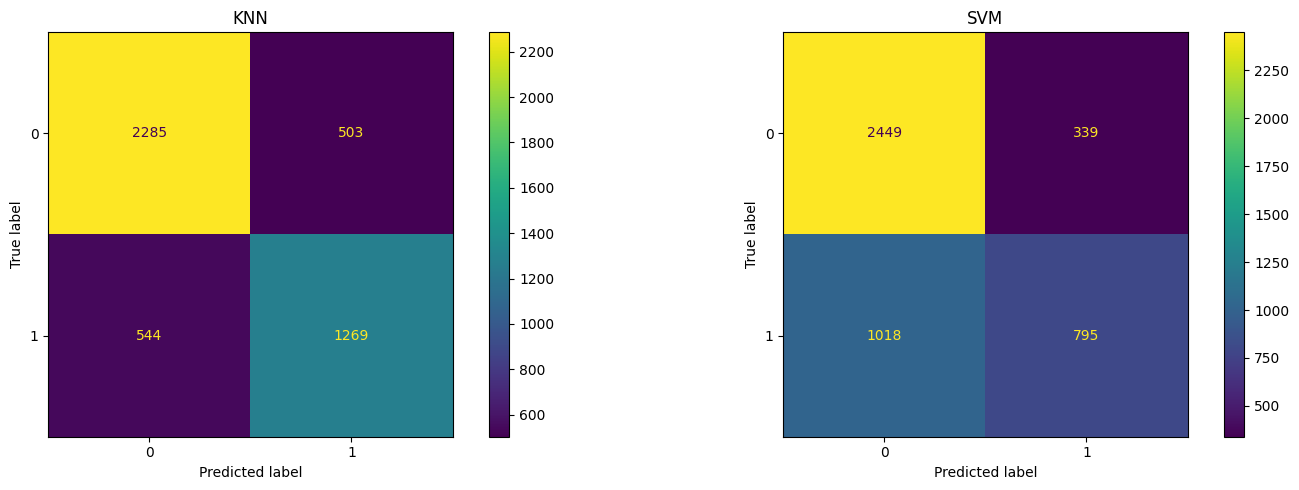

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_knn = cross_val_predict(knn, X, y, cv=5)
y_pred_svm = cross_val_predict(svm, X, y, cv=5)

disp1 = ConfusionMatrixDisplay(confusion_matrix(y, y_pred_knn))
disp2 = ConfusionMatrixDisplay(confusion_matrix(y, y_pred_svm))

# Crie subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

disp1.plot(ax=axes[0])
disp1.ax_.set_title("KNN")
disp2.plot(ax=axes[1])
disp2.ax_.set_title("SVM")

plt.tight_layout()
plt.show()